# 第十次课后练习

**负责助教：朱轩宇**

<span style="color:red; font-weight:bold;">请将作业文件命名为 第十次课后练习+姓名+学号.ipynb, 例如 第十次课后练习+张三+1000000000.ipynb</span>

<span style="color:red; font-weight:bold;">在作业过程中觉得有心得或者自己拓展学习到有价值内容的，可以在文件名最后加一个#号。例如第十次课后练习+张三+1000000000+#.ipynb</span>

<span style="color:red; font-weight:bold;">本次课同时发布课后练习和选做题，提交时请注意区分提交通道</span>

请助教老师注意，我的1.5题目的“SVD降维（LSI） 两个主题，随机数种子42”任务的那两行应是正确的，但是在本机的运行却不能正常出来std的结果（和您说过情况，我觉得是随机数问题），请您再检查一下。

# 第零部分 代码理解

请认真阅读代码，理解代码的功能，先写出预想的结果。运行并检验结果是否如预期。如果不如预期，请分析理解其中的原因

## **0.1** groupby()函数
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

In [ ]:
import pandas as pd
raw_data = {'regiment': ['Nighthawks', 'Nighthawks', 'Nighthawks', 'Nighthawks', 'Dragoons', 'Dragoons', 'Dragoons', 'Dragoons', 'Scouts', 'Scouts', 'Scouts', 'Scouts'], 
        'company': ['1st', '1st', '2nd', '2nd', '1st', '1st', '2nd', '2nd','1st', '1st', '2nd', '2nd'], 
        'name': ['Miller', 'Jacobson', 'Ali', 'Milner', 'Cooze', 'Jacon', 'Ryaner', 'Sone', 'Sloan', 'Piger', 'Riani', 'Ali'], 
        'preTestScore': [4, 24, 31, 2, 3, 4, 24, 31, 2, 3, 2, 3],
        'postTestScore': [25, 94, 57, 62, 70, 25, 94, 57, 62, 70, 62, 70]}
regiment = pd.DataFrame(raw_data, columns = raw_data.keys()) # columns = raw_data.keys()可去掉，dataframe的列名就是dict的keys名
regiment

,regiment,company,name,preTestScore,postTestScore
0,Nighthawks,1st,Miller,4,25
1,Nighthawks,1st,Jacobson,24,94
2,Nighthawks,2nd,Ali,31,57
3,Nighthawks,2nd,Milner,2,62
4,Dragoons,1st,Cooze,3,70
5,Dragoons,1st,Jacon,4,25
6,Dragoons,2nd,Ryaner,24,94
7,Dragoons,2nd,Sone,31,57
8,Scouts,1st,Sloan,2,62
9,Scouts,1st,Piger,3,70


根据字典生成dataframe，列名就是字典的keys

In [3]:
print("1.每个军团的平均测试前成绩是多少")
display(regiment.groupby('regiment')['preTestScore'].mean())

print("2.呈现每个company的统计数据")
display(regiment.groupby('company')[['preTestScore','postTestScore']].describe())

print("3.每个company的平均测试前成绩")
display(regiment.groupby('company')['preTestScore'].mean())

print("4.每个regiment和company的平均测试前成绩")
display(regiment.groupby(['regiment','company'])['preTestScore'].mean())

print("5.每个company下的regiment有多少条数据")
display(regiment.groupby(['company','regiment']).agg({'name':'count','preTestScore':'sum'}))

1.每个军团的平均测试前成绩是多少


regiment
Dragoons      15.50
Nighthawks    15.25
Scouts         2.50
Name: preTestScore, dtype: float64

2.呈现每个company的统计数据


preTestScore                                                      \
               count       mean        std  min   25%   50%    75%   max   
company                                                                    
1st              6.0   6.666667   8.524475  2.0  3.00   3.5   4.00  24.0   
2nd              6.0  15.500000  14.652645  2.0  2.25  13.5  29.25  31.0   

        postTestScore                                                       
                count       mean        std   min    25%   50%   75%   max  
company                                                                     
1st               6.0  57.666667  27.485754  25.0  34.25  66.0  70.0  94.0  
2nd               6.0  67.000000  14.057027  57.0  58.25  62.0  68.0  94.0

3.每个company的平均测试前成绩


company
1st     6.666667
2nd    15.500000
Name: preTestScore, dtype: float64

4.每个regiment和company的平均测试前成绩


regiment    company
Dragoons    1st         3.5
            2nd        27.5
Nighthawks  1st        14.0
            2nd        16.5
Scouts      1st         2.5
            2nd         2.5
Name: preTestScore, dtype: float64

5.每个company下的regiment有多少条数据


name  preTestScore
company regiment                      
1st     Dragoons       2             7
        Nighthawks     2            28
        Scouts         2             5
2nd     Dragoons       2            55
        Nighthawks     2            33
        Scouts         2             5

groupby是按哪一列分组，然后是用什么函数对哪一列聚合。比如第一个输出是分组后求pretestscore求均值。第二个是分组后统计多个分量的值做成新的dataframe。第三个同第一个。第四个是行可以是tuple来聚合。第五个是采用多个函数（对name列计数非nan值个数&对pretestscore列求和）。

groupby和agg合用：按指定列（by）进行分组，agg() 可以传入不同的聚合函数，进行多种操作

## **0.2** agg() 聚合函数
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

In [ ]:
import pandas as pd
import numpy as np
# 构建数据
df = pd.DataFrame({
    '商品名称': ['药品A', '药品B', '药品C', '药品A', '药品B', '药品C'],
    '社保卡号': ['123', '123', '456', '456', '789', '789'],
    '购药时间': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
    '销售数量': [10, 20, 30, 40, 50, 60],
    '实收金额': [100, 200, 300, 400, 500, 600]
})

#查看数据类型
print(df)

#求不同药品的销售总量，最高销售数量
#对某一列进行多种聚合操作
print(df.groupby("商品名称")["销售数量"].agg([np.sum, np.max]))
print(df.groupby("商品名称")["销售数量"].agg(["sum", "max"]))

"""这是对某一列进行多种聚合操作，np.sum和np.max与直接用sum和max都可以"""

#求不同社保卡号的拿药次数和消费总金额
print(df.groupby("社保卡号").agg({"社保卡号": "count", "实收金额": "sum"}))

"""count和sum都可以用来统计社保卡号的数量"""

#求1季度不同药品的总销售金额和总销售数量
df["购药时间"]=pd.to_datetime(df["购药时间"])

"""将字符串转换为日期格式"""

#日期类型的数据如果作为索引，不需要加dt，如果日期类型是一列，需要加dt访问日期对象
df[df["购药时间"].dt.quarter==1].groupby("商品名称").agg({"实收金额":"sum","销售数量":"sum"})

"""dt.quarter可以获取季度，dt.month可以获取月份,注意这里要用dt访问日期对象！！！！"""
"""这里在求1季度的销售金额和销售数量：先获取季度，然后再分组聚合，计算实收金额列的sum和销售数量列的sum"""

#求每个月份，不同商品的销售总数量和平均销售额
m=df["购药时间"].dt.month
print(df.groupby([m,"商品名称"]).agg({"实收金额": "mean", "销售数量": "sum"}))

"""这里在求每个月的销售金额和销售数量：按照月份和商品名称tuple分组，计算实收金额列的均值和销售数量列的sum"""

#统计每月，每种药品的最低和最高销售数量，平均和实收总金额
print(df.groupby([m, "商品名称"]).agg({"实收金额": ["mean", "sum"], "销售数量": ["max", "min"]}))

"""这里在求每个月的销售金额和销售数量：按照月份和商品名称tuple分组，计算实收金额列的均值和sum，和销售数量列的最大最小值"""

#统计每月  销售金额的跨度（每月实收金额最大值-每月最小值）
#1-7月  分为7个小组，a是每个小组的实收金额的数据
print(df.groupby(m)["实收金额"].agg(lambda a: a.max() - a.min()))

"""这里在求每个月的销售金额的跨度：按照月份分组，计算实收金额列的最大值和最小值之差"""
# 可以写lambda函数，也可以写自定义函数！！！
"""def func(a):
    return a.max() - a.min()
print(df.groupby(m)["实收金额"].agg(func))"""

  商品名称 社保卡号        购药时间  销售数量  实收金额
0  药品A  123  2023-01-01    10   100
1  药品B  123  2023-02-01    20   200
2  药品C  456  2023-03-01    30   300
3  药品A  456  2023-04-01    40   400
4  药品B  789  2023-05-01    50   500
5  药品C  789  2023-06-01    60   600
      sum  max
商品名称          
药品A    50   40
药品B    70   50
药品C    90   60
      sum  max
商品名称          
药品A    50   40
药品B    70   50
药品C    90   60
      社保卡号  实收金额
社保卡号            
123      2   300
456      2   700
789      2  1100
            实收金额  销售数量
购药时间 商品名称             
1    药品A   100.0    10
2    药品B   200.0    20
3    药品C   300.0    30
4    药品A   400.0    40
5    药品B   500.0    50
6    药品C   600.0    60
            实收金额      销售数量    
            mean  sum  max min
购药时间 商品名称                     
1    药品A   100.0  100   10  10
2    药品B   200.0  200   20  20
3    药品C   300.0  300   30  30
4    药品A   400.0  400   40  40
5    药品B   500.0  500   50  50
6    药品C   600.0  600   60  60
购药时间
1    0
2    0
3    0
4    0
5    0
6    0
Nam

/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_3589/2038269627.py:17: FutureWarning: The provided callable <function sum at 0x1129dd300> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  print(df.groupby("商品名称")["销售数量"].agg([np.sum, np.max]))
/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_3589/2038269627.py:17: FutureWarning: The provided callable <function max at 0x1129dd9e0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  print(df.groupby("商品名称")["销售数量"].agg([np.sum, np.max]))


解释见注释！

## **0.3** 数据可视化
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# 创建一个 DataFrame
df = pd.DataFrame({
    'x': np.arange(1, 11),
    'y': np.random.randn(10)
})
df

,x,y
0,1,-1.322801
1,2,1.524793
2,3,-1.174981
3,4,-0.072684
4,5,0.221163
5,6,-0.465008
6,7,-1.210287
7,8,0.509239
8,9,0.720039
9,10,-0.038286


x是1—11的numpy序列，y是10个数，服从标准正态分布

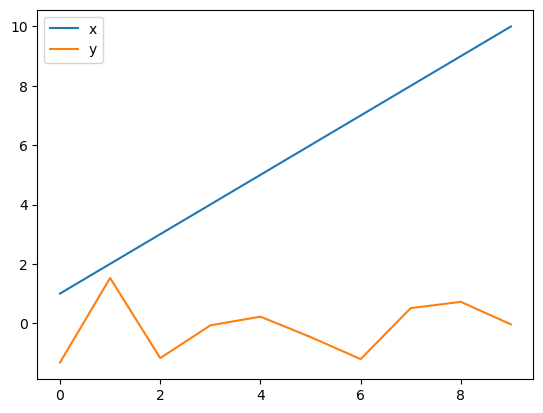

In [2]:
# 使用 plot() 函数绘制线图
df.plot(kind='line')
plt.show()

line-折线图

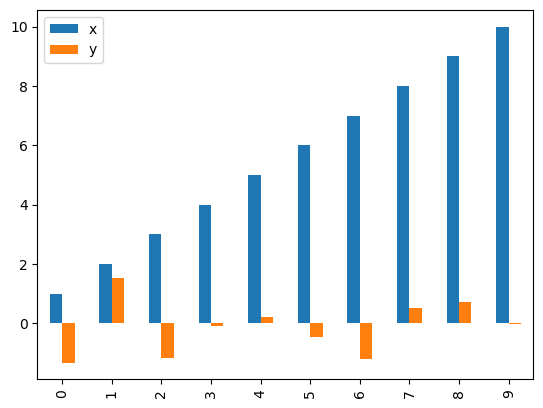

In [3]:
# 使用 plot() 函数绘制柱状图
df.plot(kind='bar')
plt.show()

bar-柱状图

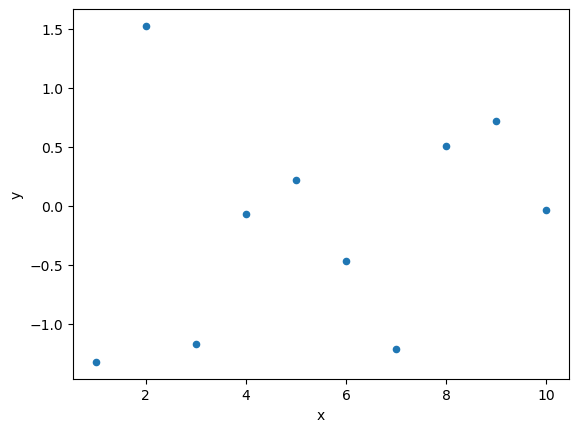

In [4]:
# 使用 plot() 函数绘制散点图
df.plot(kind='scatter', x='x', y='y')
plt.show()

scatter-散点图

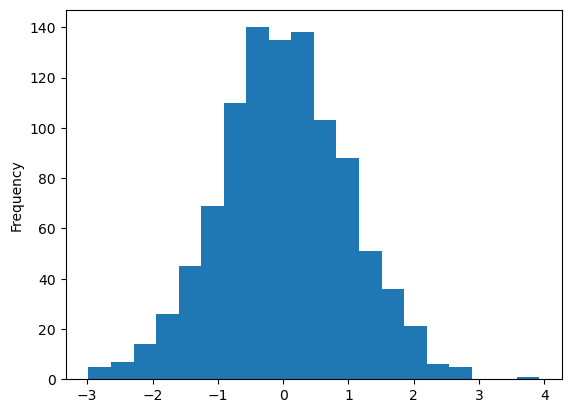

In [8]:
# 创建一个 DataFrame
df = pd.DataFrame({
    'x': np.random.randn(1000),
})

# 使用 plot() 函数绘制直方图
df['x'].plot(kind='hist', bins=20)

plt.show()

hist-直方图

## **0.4** 中文分词与词频统计
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

### 0.4.1 中文分词

In [ ]:
import jieba
import jieba.analyse

# 任务1：基础分词模式（8分）
text1 = "自然语言处理是人工智能的重要方向"
full_mode = "/".join(jieba.cut(text1, cut_all=True))   # 补全全模式分词[1,2](@ref)
precise_mode = jieba.lcut(text1)                     # 补全精确模式函数[2,3](@ref)
search_mode = jieba.lcut_for_search(text1)          # 保留搜索引擎模式分词

print("全模式:", full_mode)
print("精确模式:", precise_mode)
print("搜索模式:", search_mode)

# 自定义词典操作
# 加载词典文件（格式：词语 词频 词性）
custom_dict = """人工智能 500 n
超导量子芯片 300
北京大学 1000 ns
jieba 10 x
动态新词 200 n
"""
with open("custom_dict.txt", "w", encoding="utf-8") as f:
    f.write(custom_dict)  # 将自定义词典写入文件

jieba.load_userdict("custom_dict.txt")
text2 = "小明硕士毕业于中国科学院计算所，后在日本京都大学深造"
seg2 = jieba.lcut(text2)
print("加载词典前:", seg2) 

# 动态添加新词（要求：使"中国科学院计算所"不被拆分）!!!!!!
jieba.add_word("中国科学院计算所", freq=200)
seg2_new = jieba.lcut(text2)
print("加载词典后:", seg2_new)

#动态调整词典
text3 = "江州市长江大桥设计方案引发争议"
seg3_1 = jieba.lcut(text3)
print("动态调整前:", seg3_1)
# 调整词频使"江州/市/长江大桥"变为"江州市/长江大桥"
jieba.suggest_freq('江州市', tune=True)  # 调整"江州市"
seg3 = jieba.lcut(text3)
print("动态调整后:", seg3)

#关键词抽取
text4 = """机器学习是人工智能的核心技术，深度学习通过神经网络实现特征学习，
          强化学习则注重智能体与环境的交互反馈。"""
# 基于TF-IDF算法提取top3关键词
keywords_tfidf = jieba.analyse.extract_tags(text4, topK=3)
# 基于TextRank算法提取top2关键词（限定名词和动词）
keywords_tr = jieba.analyse.textrank(text4, topK=2, allowPOS=('n','vn','v'))

print("TF-IDF关键词:", keywords_tfidf)
print("TextRank关键词:", keywords_tr)

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/jieba.cache
Loading model cost 0.199 seconds.
Prefix dict has been built successfully.


全模式: 自然/自然语言/语言/处理/是/人工/人工智能/智能/的/重要/方向
精确模式: ['自然语言', '处理', '是', '人工智能', '的', '重要', '方向']
搜索模式: ['自然', '语言', '自然语言', '处理', '是', '人工', '智能', '人工智能', '的', '重要', '方向']
加载词典前: ['小明', '硕士', '毕业', '于', '中国科学院', '计算所', '，', '后', '在', '日本京都大学', '深造']
加载词典后: ['小明', '硕士', '毕业', '于', '中国科学院计算所', '，', '后', '在', '日本京都大学', '深造']
动态调整前: ['江州', '市', '长江大桥', '设计方案', '引发', '争议']
动态调整后: ['江州市', '长江大桥', '设计方案', '引发', '争议']
TF-IDF关键词: ['学习', '神经网络', '人工智能']
TextRank关键词: ['学习', '环境']


jieba分词的写法：jieba.lcut(text)，返回一个list是分词结果

jieba.load_userdict("custom_dict.txt")可以加入自定义的词语和词频。 jieba.add_word("中国科学院计算所", freq=200)可以动态加词。

jieba.suggest_freq('江州市', tune=True) 可以调整词频，让这个词更可能被切成一个完整的词

#### 基于TF-IDF算法提取top3关键词：
keywords_tfidf = jieba.analyse.extract_tags(text4, topK=3)
#### 基于TextRank算法提取top2关键词（限定名词和动词）：
keywords_tr = jieba.analyse.textrank(text4, topK=2, allowPOS=('n','vn','v'))

### 0.4.2 词频统计

高频名词: [('领域', 2), ('词', 2), ('语义', 2), ('中文', 2), ('词汇', 2)]
高频动词: [('如', 6), ('学习', 3), ('处理', 2), ('发展', 2), ('生成', 2)]


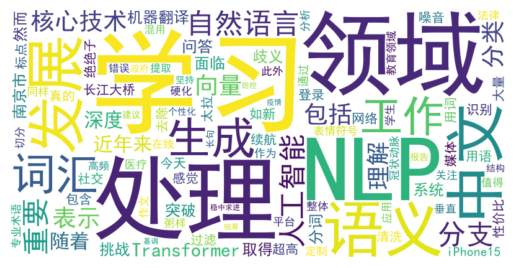

In [ ]:
import jieba
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 数据准备
text = """
自然语言处理（NLP）是人工智能领域的重要分支，其核心技术包括词向量表示、文本分类和语义理解。近年来，随着深度学习的发展，Transformer模型如BERT、GPT已在机器翻译、问答系统中取得突破。然而，中文NLP仍面临挑战：例如，中文分词歧义（如“南京市长江大桥”）、未登录词识别（如新网络用语“绝绝子”）等。

在社交媒体场景中，用户生成的文本常包含大量噪音。例如：“我今天买了iPhone15，感觉性价比超高！但续航真的太拉胯了……[笑哭]”。这类文本需清洗标点、去除停用词（如“的”“了”）和过滤表情符号。此外，垂直领域（如医疗、法律）的专业术语也需要定制化处理，例如“冠状动脉粥样硬化”应作为整体词汇切分。

教育领域的应用同样值得关注。在线学习平台通过分析学生作文，可提取高频错误词汇（如“的地得”混用），并生成个性化学习建议。而政府工作报告中的长句结构（如“坚持稳中求进工作总基调，统筹疫情防控和经济社会发展”）则需结合语义角色标注进行关键信息提取。
"""

# 停用词处理
stopwords = [
    # 基础虚词
    "的", "了", "是", "在", "和", "与", "或", "等", "而", "但",
    # 标点与符号
    "（", "）", "，", "。", "！", "……", "[", "]",
    # 高频无意义词
    "例如", "例如", "例如", "这类", "需要", "例如",
    # 领域相关停用词（根据需求扩展）
    "用户", "场景", "文本", "模型", "数据",  
    # 数字与英文（可选过滤项）
    "15", "iPhone", "BERT", "GPT"
]
words = jieba.lcut(text)
filtered_words = [word for word in words if word not in stopwords and len(word) > 1]

# 分类高频词提取
# 提取名词（词性为'n'）和动词（词性为'v'）
nouns, verbs = [], []
for word, flag in jieba.posseg.lcut(text):
    if flag.startswith('n') and word not in stopwords:
        nouns.append(word)
    elif flag.startswith('v') and word not in stopwords:
        verbs.append(word)

# 统计高频词（取Top5）
top_nouns = Counter(nouns).most_common(5)
top_verbs = Counter(verbs).most_common(5)
# Counter()函数在库collections中，用于统计词频

print("高频名词:", top_nouns)
print("高频动词:", top_verbs)

# 词云生成
def generate_wordcloud(word_list):
    # 补全：生成词云图（需设置中文字体路径）
    wordcloud = WordCloud(
        font_path='simhei.ttf',  # 字体路径（如无此文件需下载）
        width=800, height=400,
        background_color='white',
        max_words=100
    ).generate(' '.join(word_list))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

generate_wordcloud(filtered_words)

collection里面的Counter可以统计词语出现次数，.most_common(5)取前5个频率最高的。

for word, flag in jieba.posseg.lcut(text):是在提取名词（词性为'n'）和动词（词性为'v'），用flag.startwith('n'或'v')判断

## **0.4** 基于主题模型的文本分析
    阅读下面代码，观察运行的结果，解释出现这个结果的原因。

In [ ]:
import pandas as pd
import os
import re
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 下面的 url 是 csv 文件的远程链接，如果你缺失这个文件，则需要用浏览器打开这个链接
url = 'https://raw.githubusercontents.com/Micro-sheep/Share/main/zhihu/answers.csv'
# 本地 csv 文档路径
csv_path = 'answers.csv'
# 待分词的 csv 文件中的列
document_column_name = '回答内容'
pattern = u'[\\s\\d,.<>/?:;\'\"[\\]{}()\\|~!\t"@#$%^&*\\-_=+a-zA-Z，。\n《》、？：；“”‘’｛｝【】（）…￥！—┄－]+'
# 下载 csv 文件
if not os.path.exists(csv_path):
    import requests
    response = requests.get(url)
    with open(csv_path, 'wb') as f:
        f.write(response.content)
# 读取 csv 文件
df = (
    pd.read_csv(
        csv_path,
        encoding='utf-8-sig')
    .drop_duplicates()
    .rename(columns={
        document_column_name: 'text'
    }))

# 去重、去缺失、分词
df['cut'] = (
    df['text']
    .apply(lambda x: str(x))
    .apply(lambda x: re.sub(pattern, ' ', x))
    .apply(lambda x: " ".join(jieba.lcut(x)))
)
# 构造 TF-IDF
tf_idf_vectorizer = TfidfVectorizer()
tf_idf = tf_idf_vectorizer.fit_transform(df['cut'])
# 特征词列表
feature_names = tf_idf_vectorizer.get_feature_names_out()
# 特征词 TF-IDF 矩阵
matrix = tf_idf.toarray()
feature_names_df = pd.DataFrame(matrix,columns=feature_names)
print(feature_names_df)
# 特征词 TF-IDF 矩阵
matrix = tf_idf.toarray()
# 指定 lda 主题数
n_topics = 5
lda = LatentDirichletAllocation(
    n_components=n_topics, max_iter=50,
    learning_method='online',
    learning_offset=50.,
    random_state=0)
# 核心，给 LDA 喂生成的 TF-IDF 矩阵
lda.fit(tf_idf)

### 去重、去缺失、分词的高效写法：
```python
pattern = u'[\\s\\d,.<>/?:;\'\"[\\]{}()\\|~!\t"@#$%^&*\\-_=+a-zA-Z，。\n《》、？：；“”‘’｛｝【】（）…￥！—┄－]+'
df['cut'] = (
    df['text']
    .apply(lambda x: str(x))
    .apply(lambda x: re.sub(pattern, ' ', x))
    .apply(lambda x: " ".join(jieba.lcut(x)))
)
```
然后就是基本的构造 TF-IDF、get_feature_names_out()是在求特征词语、

matrix = tf_idf.toarray()是特征词 TF-IDF 矩阵，再喂给lda。


### 1.数据预处理

### 2.TF-IDF

### 3.LDA建模

### 4.主题解读

In [3]:
import numpy as np

def top_words_data_frame(model: LatentDirichletAllocation,
                         tf_idf_vectorizer: TfidfVectorizer,
                         n_top_words: int) -> pd.DataFrame:
    '''
    求出每个主题的前 n_top_words 个词
    '''
    rows = []
    feature_names = tf_idf_vectorizer.get_feature_names_out()
    for topic in model.components_:
        top_words = [feature_names[i]
                     for i in topic.argsort()[:-n_top_words - 1:-1]]
        rows.append(top_words)
    columns = [f'topic {i+1}' for i in range(n_top_words)]
    df = pd.DataFrame(rows, columns=columns)

    return df


def predict_to_data_frame(model: LatentDirichletAllocation, X: np.ndarray) -> pd.DataFrame:
    '''
    求出文档主题概率分布情况
    '''
    # 求出给定文档的主题概率分布矩阵
    matrix = model.transform(X)
    columns = [f'P(topic {i+1})' for i in range(len(model.components_))]
    df = pd.DataFrame(matrix, columns=columns)
    return df

In [4]:
# 计算 n_top_words 个主题词
n_top_words = 5
top_words_df = top_words_data_frame(lda, tf_idf_vectorizer, n_top_words)
display(top_words_df)

# 转 tf_idf 为数组，以便后面使用它来对文本主题概率分布进行计算
X = tf_idf.toarray()

# 计算完毕主题概率分布情况
predict_df = predict_to_data_frame(lda, X)
predict_df

,topic 1,topic 2,topic 3,topic 4,topic 5
0,交往,泼妇骂街,附送,青菜,次数
1,深受,干哥,往前走,明年,常呆
2,自己,绝交,对方,好话,婴儿油
3,假装,中年人,原意,网站,创业
4,自己,一个,学习,可以,如果


,P(topic 1),P(topic 2),P(topic 3),P(topic 4),P(topic 5)
0,0.009561,0.009561,0.009561,0.009560,0.961758
1,0.010303,0.010303,0.010303,0.010302,0.958790
2,0.011009,0.011009,0.011009,0.011009,0.955964
3,0.009108,0.009108,0.009108,0.009108,0.963568
4,0.007989,0.007989,0.007989,0.007989,0.968044
...,...,...,...,...,...
213,0.008019,0.008019,0.008019,0.008019,0.967924
214,0.015616,0.015616,0.015616,0.015616,0.937536
215,0.010898,0.010898,0.010899,0.010898,0.956406
216,0.200000,0.200000,0.200000,0.200000,0.200000


这里求出每个主题的前 n_top_words 个词

求top5主题词：
```python
n_top_words = 5
top_words_df = top_words_data_frame(lda, tf_idf_vectorizer, n_top_words)
```

计算概率分布：
```python
X = tf_idf.toarray()
predict_df = predict_to_data_frame(lda, X)
predict_df
```

# 第一部分 基础练习

In [6]:
# 答案读取
import pandas as pd
import pickle

with open('stdout.pkl', 'rb') as f:
    stdout = pickle.load(f)

## **1.1** groupby()
    给定DataFrame，求A列每个值的前3大的B的和

In [4]:
df = pd.DataFrame({'A': list('aaabbcaabcccbbc'), 
                   'B': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

##############################
# TODO 使用一行代码实现，求出每个组的前3个最大值的和
df1_1 = df.groupby('A')['B'].apply(lambda x: x.nlargest(3).sum())
##############################

df1_1

A
a    409
b    156
c    345
Name: B, dtype: int64

In [5]:
assert df1_1.equals(stdout['expect1_1'])

    给定DataFrame，有列A, B，A的值在1-100（含），对A列每10步长，求对应的B的和

In [13]:
import numpy as np
df = pd.DataFrame({'A': [1,2,11,11,33,34,35,40,79,99], 
                   'B': [1,2,11,11,33,34,35,40,79,99]})
##############################
# TODO 使用一行代码实现
df1_2 = df.groupby(pd.cut(df['A'], range(0, 101, 10)))['B'].sum() # 也可以np.arange(0, 101, 10)，也是等差数列
##############################

df1_2

/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_3786/533524936.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1_2 = df.groupby(pd.cut(df['A'], range(0, 101, 10)))['B'].sum()


A
(0, 10]        3
(10, 20]      22
(20, 30]       0
(30, 40]     142
(40, 50]       0
(50, 60]       0
(60, 70]       0
(70, 80]      79
(80, 90]       0
(90, 100]     99
Name: B, dtype: int64

In [14]:
assert df1_2.equals(stdout['expect1_2'])

## **1.2** agg()

In [7]:
import pandas as pd

df = pd.DataFrame({'Country':['China','China', 'India', 'India', 'America', 'Japan', 'China', 'India'], 
                'Income':[10000, 10000, 5000, 5002, 40000, 50000, 8000, 5000],
                    'Age':[5000, 4321, 1234, 4010, 250, 250, 4500, 4321]})
df

,Country,Income,Age
0,China,10000,5000
1,China,10000,4321
2,India,5000,1234
3,India,5002,4010
4,America,40000,250
5,Japan,50000,250
6,China,8000,4500
7,India,5000,4321


In [ ]:
##############################
# TODO 使用一行代码实现，计算每个国家的平均收入和年龄
df2_1 = df.groupby('Country').agg({"Income": "mean", "Age": "mean"})
# df2_1 = df.groupby('Country')[['Income', 'Age']].mean()
##############################

##############################
# TODO 使用一行代码实现，计算每个国家的年龄和收入的最小值、最大值和平均值（注意年龄在前收入在后）
df2_2 = df.groupby('Country').agg({"Age": ["min", "max", "mean"], "Income": ["min", "max", "mean"]})
# df2_2 = df.groupby('Country')[['Age', 'Income']].agg(["min", "max", "mean"])
##############################

display(df2_1)
display(df2_2)

,Income,Age
Country,,
America,40000.000000,250.000000
China,9333.333333,4607.000000
India,5000.666667,3188.333333
Japan,50000.000000,250.000000


Age                    Income                     
          min   max         mean    min    max          mean
Country                                                     
America   250   250   250.000000  40000  40000  40000.000000
China    4321  5000  4607.000000   8000  10000   9333.333333
India    1234  4321  3188.333333   5000   5002   5000.666667
Japan     250   250   250.000000  50000  50000  50000.000000

In [21]:
assert df2_1.equals(stdout['expect2_1'])
assert df2_2.equals(stdout['expect2_2'])

## **1.3** 数据可视化

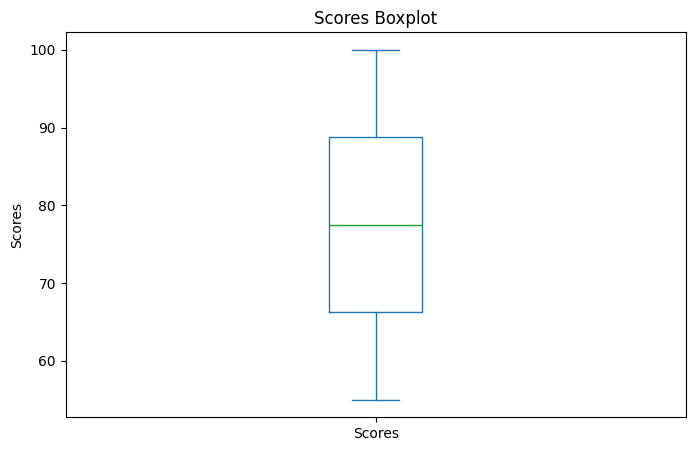

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# 示例数据
data = {'Scores': [55, 70, 85, 90, 60, 75, 80, 95, 100, 65]}
df = pd.DataFrame(data)

##############################
# TODO 
# 绘制箱线图，直接使用 df.plot() 方法
df.plot(kind = 'box', title = 'Scores Boxplot', figsize = (8, 5), ylabel = 'Scores')
##############################
plt.show()

## **1.4** 中文分词与词频统计

用 jieba 分词，计算字符串 s 中的中文词汇个数，不包括中文标点符号。显示输分词后的结果，用”/ ”分隔，以及中文词汇个数。示例如下：

输入：

工业互联网实施的方式是通过通信、控制和计算技术的交叉应用，建造一个信息物理系统，促进物理系统和数字系统的融合。

输出：

工业/ 互联网/实施/ 的/ 方式/是/ 通过/ 通信/控制/ 和/ 计算技术/的/ 交叉/ 应用/建造/ 一个/ 信息/物理/ 系统/ 促进/物理/ 系统/ 和/数字/ 系统/ 的/融合/

中文词语数是：27

问题2：在问题1的基础上，统计分词后的词汇出现的次数，用字典结构保存。显示输出每个词汇出现的次数，以及出现次数最多的词汇。如果有多个词汇出现次数一样多，都要显示出来。

In [32]:
import jieba
import re

def process_text(s):
    ##############################
    # TODO 
    # 使用jieba对输入s分词
    words = jieba.lcut(re.sub(r"\s+", " ", s)) # 精确模式分词
    # 使用正则表达式匹配中文标点符号（根据Unicode范围）
    chinese_punct = r'[\u3000-\u303F\uFF00-\uFFEF\u2010-\u201F\u2024-\u2027\u2030-\u203E\u2041-\u205E]'
    # 过滤标点符号
    filtered = [w for w in words if not re.fullmatch(chinese_punct, w)]
    ##############################
    
    # 拼接结果并统计数量
    segmented = "/ ".join(filtered) + "/"
    return segmented, len(filtered)

# 示例输入
s = "工业互联网实施的方式是通过通信、控制和计算技术的交叉应用，建造一个信息物理系统，促进物理系统和数字系统的融合。"
segmented_text, count = process_text(s)

print("分词结果：")
print(segmented_text)
print("中文词语数是：", count)

分词结果：
工业/ 互联网/ 实施/ 的/ 方式/ 是/ 通过/ 通信/ 控制/ 和/ 计算技术/ 的/ 交叉/ 应用/ 建造/ 一个/ 信息/ 物理/ 系统/ 促进/ 物理/ 系统/ 和/ 数字/ 系统/ 的/ 融合/
中文词语数是： 27


In [33]:
assert segmented_text == stdout['expect1_4_1']

In [ ]:
def Counter(segmented_list):
    word_counts = {}
    ##############################
    # TODO 
    # 统计词频
    word_counts = pd.Series(segmented_list).value_counts().to_dict() # value_counts()统计词频，返回一个字典
    # 另一种方法：
    """for word in segmented_list:
        if word not in word_counts:
            word_counts[word] = 1
        else:
            word_counts[word] += 1"""
    ##############################
    return word_counts

def count_word_freq(segmented_list):
    # 统计词频
    word_counts = Counter(segmented_list) # word_counts是一个字典，key是词，value是词频！
    # 找到最高频词
    max_freq = max(word_counts.values(), default=0)
    most_common = [k for k, v in word_counts.items() if v == max_freq]
    return word_counts, most_common

# 调用函数
word_freq, top_words = count_word_freq(segmented_text.split("/ ")[:-1])  # 去除末尾空元素

print("词频统计结果：")
for word, freq in word_freq.items():
    print(f"{word}: {freq}次")

print("\n出现次数最多的词汇：")
print("、".join(top_words))

display(word_freq)
display(top_words)

词频统计结果：
的: 3次
系统: 3次
物理: 2次
和: 2次
工业: 1次
交叉: 1次
促进: 1次
信息: 1次
一个: 1次
建造: 1次
应用: 1次
计算技术: 1次
互联网: 1次
控制: 1次
通信: 1次
通过: 1次
是: 1次
方式: 1次
实施: 1次
数字: 1次

出现次数最多的词汇：
的、系统


{'的': 3,
 '系统': 3,
 '物理': 2,
 '和': 2,
 '工业': 1,
 '交叉': 1,
 '促进': 1,
 '信息': 1,
 '一个': 1,
 '建造': 1,
 '应用': 1,
 '计算技术': 1,
 '互联网': 1,
 '控制': 1,
 '通信': 1,
 '通过': 1,
 '是': 1,
 '方式': 1,
 '实施': 1,
 '数字': 1}

['的', '系统']

In [37]:
assert word_freq == stdout['expect1_4_2']
assert top_words == stdout['expect1_4_3']

## **1.5** 基于主题模型的文本分析（LSI/LDA/NMF）

非负矩阵分解（NMF）、潜在语义索引（LSI/SVD）和潜在狄利克雷分配（LDA）在主题建模中各有特点。


### NMF：

NMF: min∥V−WH∥ F 2 ​ , s.t. W , H ≥ 0 W,H≥0

#### LSI:

V≈UΣV T （最小化Frobenius范数）

求解方法：数值优化（梯度下降、ALS等）或SVD分解。

#### LDA：

对每个文档 d d，从狄利克雷分布生成主题分布 θ d ∼ Dir ( α ) θ d ​ ∼Dir(α)；

对文档中的每个词 w d i w di ​ ：

采样主题 z d i ∼ Multinomial ( θ d ) z di ​ ∼Multinomial(θ d ​ )；

采样词 w d i ∼ Multinomial ( ϕ z d i ) w di ​ ∼Multinomial(ϕ z di ​

​ )。

求解方法：变分推断（VI）、吉布斯采样（MCMC）或在线学习。

#### 主题分析的结果本质对比：

主题表示的本质区别

NMF：

主题是词的线性组合（如“体育=0.6×足球+0.3×比赛”），权重直接反映重要性。

优点：直观，适合人工标注；缺点：无概率框架，难以量化其不确定性。（算法不保证收敛在最优解）

LDA：

主题是词的概率分布（如“体育: P(足球)=0.4, P(比赛)=0.3”）。

优点：天然归一化，可计算生成概率；缺点：需调参（超参数 
α
,
β
α,β）。

#### 实际应用选择：

核心选择依据：

可解释性：NMF ≈ LDA > LSI

概率框架：仅LDA支持

计算效率：NMF/LSI > LDA



# 请助教老师注意，我的1.5题目的“SVD降维（LSI） 两个主题，随机数种子42”任务的那两行应是正确的，但是在本机的运行却不能正常出来std的结果（和您说过情况），请您再检查一下。谢谢老师！！

In [42]:
texts = [
    "自然语言处理是人工智能的核心技术，Transformer模型在机器翻译中表现出色。",
    "社交媒体中的噪音数据需清洗标点，例如“绝绝子”等网络新词需要特殊处理。",
    "在线教育平台通过分析学生作文，识别高频错误词汇如“的地得”混淆问题。",
    "政府工作报告的长句结构需结合语义角色标注提取关键信息。",
    "深度学习模型需要大量数据和算力支持，超导量子芯片可能解决这一瓶颈。"
]

1. 数据预处理与词袋模型构建
   - 使用 jieba 分词并过滤停用词（停用词表需包含虚词、标点及领域相关词汇如“模型”“数据”）
   - 构建 文档-词频矩阵（TF-IDF 或词袋模型）

In [43]:
import jieba
from sklearn.feature_extraction.text import TfidfVectorizer

custom_dict = """人工智能 500 n
超导量子芯片 300
北京大学 1000 ns
jieba 10 x
动态新词 200 n
"""
with open("custom_dict.txt", "w", encoding="utf-8") as f:
    f.write(custom_dict)  # 将自定义词典写入文件

jieba.load_userdict("custom_dict.txt")

# 停用词表示例
stopwords = ["的", "是", "在", "需", "等", "例如", "结合", "问题", "，", "“", "”"]

# 分词与过滤
def preprocess(texts):
    processed = []
    for text in texts:
        ##############################
        # TODO 
        # 分词,去掉停用词和长度小于2的词
        words = jieba.lcut(text)
        words = [word for word in words if (word not in stopwords and len(word) > 1)]
        ##############################

        processed.append(' '.join(words))
    return processed

processed_texts = preprocess(texts)
display(processed_texts)
##############################
# TODO
# 构建TF-IDF矩阵并输出
vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(processed_texts)

##############################

# 输出TF-IDF矩阵
print("TF-IDF矩阵：")
display(dtm.toarray())

['自然语言 处理 人工智能 核心技术 Transformer 模型 机器翻译 表现出色',
 '社交 媒体 噪音 数据 清洗 标点 绝绝子 网络 新词 需要 特殊 处理',
 '在线教育 平台 通过 分析 学生 作文 识别 高频 错误 词汇 混淆',
 '政府 工作 报告 长句 结构 语义 角色 标注 提取 关键 信息',
 '深度 学习 模型 需要 大量 数据 算力 支持 超导量子芯片 可能 解决 这一 瓶颈']

TF-IDF矩阵：


array([[0.37007017, 0.37007017, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.29857028,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37007017, 0.        , 0.        ,
        0.37007017, 0.29857028, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.37007017, 0.37007017, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30216103, 0.        , 0.24378161,
        0.        , 0.30216103, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.24378161, 0.30216

In [44]:
stdout['expect1_5_1_1']

['自然语言 处理 人工智能 核心技术 Transformer 模型 机器翻译 表现出色',
 '社交 媒体 噪音 数据 清洗 标点 绝绝子 网络 新词 需要 特殊 处理',
 '在线教育 平台 通过 分析 学生 作文 识别 高频 错误 词汇 混淆',
 '政府 工作 报告 长句 结构 语义 角色 标注 提取 关键 信息',
 '深度 学习 模型 需要 大量 数据 算力 支持 超导量子芯片 可能 解决 这一 瓶颈']

In [45]:
assert processed_texts == stdout['expect1_5_1_1']

2. SVD-LSI 实现
    - 使用 TruncatedSVD 对dtm进行降维（主题数设为2），
    - 输出每个主题的前3个关键词

In [56]:
from sklearn.decomposition import TruncatedSVD
##############################
# TODO
# SVD降维（LSI） 两个主题，随机数种子42

svd = TruncatedSVD(n_components = 2, random_state=42)
lsa_topics = svd.fit_transform(dtm)

##############################

# 输出主题词
result5_2_1 = []
terms = vectorizer.get_feature_names_out()
for idx, component in enumerate(svd.components_):
    top_terms = [terms[i] for i in component.argsort()[:-4:-1]]
    print(f"LSI主题{idx}: {', '.join(top_terms)}")
    result5_2_1.append(top_terms)

LSI主题0: 处理, 模型, 数据
LSI主题1: 作文, 高频, 在线教育


In [52]:
assert result5_2_1 == stdout['expect1_5_2_1']

AssertionError: 

3. NMF 主题合成
   - 使用 NMF 分解矩阵（主题数设为2）

In [71]:
from sklearn.decomposition import NMF

# 这里就直接给出答案请大家学习

nmf = NMF(n_components=2, init='nndsvd', random_state=42)
nmf_topics = nmf.fit_transform(dtm)

result5_3_1 = []
for idx, topic in enumerate(nmf.components_):
    top_terms = [terms[i] for i in topic.argsort()[:-4:-1]]
    print(f"NMF主题{idx}: {', '.join(top_terms)}")
    result5_3_1.append(top_terms)

NMF主题0: 处理, 模型, 数据
NMF主题1: 角色, 标注, 长句


/Users/gaojingxing/miniconda3/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1742: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


In [72]:
assert result5_3_1 == stdout['expect1_5_3_1']

AssertionError: 

4. LDA 主题建模
    - 使用 gensim 训练 LDA 模型（主题数设为2）
    - 输出文档-主题分布和主题-词分布

In [73]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

# 使用CountVectorizer替代gensim的词袋模型
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_texts)

# 这里就直接给出答案请大家对比学习
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)


# 输出主题词
result5_4_1 = []
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-4:-1]  # 获取前3个词
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"LDA主题{topic_idx}: {', '.join(top_words)}")
    result5_4_1.append(top_words)

LDA主题0: 数据, 需要, 算力
LDA主题1: 处理, 模型, 结构


In [74]:
assert result5_4_1 == stdout['expect1_5_4_1']

AssertionError: 

# 第二部分 进阶练习

## **2.1** 电商平台销售数据分析

In [22]:
import pandas as pd

orders = {
    '订单ID': [1001, 1002, 1003, 1004, 1005, 1006],
    '客户ID': ['C001', 'C002', 'C003', 'C001', 'C004', 'C002'],
    '产品类别': ['电子产品', '家居用品', '服装', '家居用品', '电子产品', '服装'],
    '金额': [2999, 899, 459, 1299, 5999, 799],
    '日期': ['2024-10-05', '2024-11-12', '2024-12-20', '2024-12-25', '2024-10-18', '2024-11-30']
}

customers = {
    '客户ID': ['C001', 'C002', 'C003', 'C004', 'C005'],
    '地区': ['北京', '上海', '广州', '深圳', '杭州'],
    '注册日期': ['2020-05-01', '2021-08-15', '2022-03-22', '2023-11-10', '2024-09-01']
}

df_orders = pd.DataFrame(orders)
df_customers = pd.DataFrame(customers)
display(df_orders.head())
display(df_customers.head())

,订单ID,客户ID,产品类别,金额,日期
0,1001,C001,电子产品,2999,2024-10-05
1,1002,C002,家居用品,899,2024-11-12
2,1003,C003,服装,459,2024-12-20
3,1004,C001,家居用品,1299,2024-12-25
4,1005,C004,电子产品,5999,2024-10-18


,客户ID,地区,注册日期
0,C001,北京,2020-05-01
1,C002,上海,2021-08-15
2,C003,广州,2022-03-22
3,C004,深圳,2023-11-10
4,C005,杭州,2024-09-01


In [ ]:
import pandas as pd

# 步骤1：数据合并
##############################
# TODO
# 根据客户ID合并订单和客户数据
merged = pd.merge(df_orders, df_customers, on = '客户ID', how = 'left')
##############################
display(merged.head())
# display(stdout['expect2_1_1'])
assert merged.equals(stdout['expect2_1_1'])

# 步骤2：分组统计
##############################
# TODO
# 按地区聚合，计算总销售额和平均订单金额，并重命名列
region_stats = merged.groupby('地区').agg({"金额": ["sum", "mean"]})
region_stats.columns = ['总销售额', '平均订单金额']
region_stats = region_stats.reset_index()

"""region_stats = merged.groupby('地区')['金额'].agg(["sum", "mean"])
region_stats = region_stats.rename(columns = {'sum': '总销售额', 'mean':'平均订单金额'})
region_stats = region_stats.reset_index()"""
################################
display(region_stats.head())
# display(stdout['expect2_1_2'])
assert region_stats.equals(stdout['expect2_1_2'])  # 保存地区统计数据

# 多维度分组
##############################
# TODO
# 按地区和产品类别聚合，计算订单量，并按地区和订单量排序，ascending=[True, False]
product_stats = merged.groupby(['地区', '产品类别']).agg({"订单ID": "count"})
product_stats.columns = ['订单量']
product_stats = product_stats.sort_values(by=['地区', '订单量'], ascending=[True, False])

################################
display(product_stats.head())
# display(stdout['expect2_1_3'])
assert product_stats.equals(stdout['expect2_1_3'])  # 验证产品统计数据

# 步骤3：高级聚合
##############################
# TODO
# 客户级分析，根据客户ID计算最大消费和最近消费日期
customer_analysis = merged.groupby('客户ID').agg({"金额": "max", "日期": "max"})
customer_analysis.columns = ['最大消费', '最近消费']

################################
display(customer_analysis.head())
# display(stdout['expect2_1_4'])
assert customer_analysis.equals(stdout['expect2_1_4'])  # 验证客户分析数据

##############################
# TODO
# 月度环比计算，按月份聚合，计算销售额和订单量，并计算环比增长率
merged['日期'] = pd.to_datetime(merged['日期'])
# 将日期设置为索引，并按月份重采样，计算销售额和订单量（订单量基于订单ID计算）
monthly = merged.set_index('日期').resample('M').agg({"金额": "sum", "订单ID": "count"})

# 计算订单量的环比增长率，使用pct_change()方法，并乘以100转换为百分比
monthly['增长率'] = monthly['订单ID'].pct_change() * 100
################################
display(monthly.head())
# display(stdout['expect2_1_5'])
assert monthly.equals(stdout['expect2_1_5'])  # 验证月度环比数据

##############################
# TODO
# 步骤4：关联分析，计算注册时长与消费金额的相关性
merged['注册日期'] = pd.to_datetime(merged['注册日期'])
merged['注册时长'] = (pd.to_datetime('2024-12-31') - merged['注册日期']).dt.days
# 计算相关性，使用corr()方法，并选择注册时长和金额列
correlation = merged[ ['注册时长', '金额'] ].corr().iloc[0, 1]  # 取出相关系数值（单个数值），而不是相关性矩阵！！
################################
display(correlation)
# display(stdout['expect2_1_6'])
assert correlation == stdout['expect2_1_6']  # 验证相关性数据

,订单ID,客户ID,产品类别,金额,日期,地区,注册日期
0,1001,C001,电子产品,2999,2024-10-05,北京,2020-05-01
1,1002,C002,家居用品,899,2024-11-12,上海,2021-08-15
2,1003,C003,服装,459,2024-12-20,广州,2022-03-22
3,1004,C001,家居用品,1299,2024-12-25,北京,2020-05-01
4,1005,C004,电子产品,5999,2024-10-18,深圳,2023-11-10


,地区,总销售额,平均订单金额
0,上海,1698,849.0
1,北京,4298,2149.0
2,广州,459,459.0
3,深圳,5999,5999.0


订单量
地区 产品类别     
上海 家居用品    1
   服装      1
北京 家居用品    1
   电子产品    1
广州 服装      1

,最大消费,最近消费
客户ID,,
C001,2999,2024-12-25
C002,899,2024-11-30
C003,459,2024-12-20
C004,5999,2024-10-18


/var/folders/hn/gy9cbfnj2fxdtcx87x8ptv_w0000gn/T/ipykernel_28869/198764275.py:59: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = merged.set_index('日期').resample('M').agg({"金额": "sum", "订单ID": "count"})


,金额,订单ID,增长率
日期,,,
2024-10-31,8998,2,NaN
2024-11-30,1698,2,0.0
2024-12-31,1758,2,0.0


-0.545431767167346

## **2.2** 文本主题分析与可视化

In [37]:
import pandas as pd

data = {
    "领域": ["科技"] * 10 + ["医疗"] * 10 + ["法律"] * 10,
    "内容": [
        "量子计算芯片基于超导电路实现，其核心器件是超导约瑟夫森结，由超导体-绝缘介质-超导体构成，绝缘层厚度在纳米量级[[7]]。超导量子电路与现有集成电路技术高度兼容，支持量子比特的设计、制备和测量[[1]]。约瑟夫森结的非线性特性使超导谐振电路呈现非简谐能级分布，可单独控制能级跃迁以实现量子操作[[4]]。二维网络结构通过量子比特耦合单元共享公共比特实现扩展，提升芯片集成度[[3]]。",
        
        "超导量子芯片的量子比特通过瑟夫森结电路实现，其相干时间是衡量性能的核心指标之一。清华大学团队通过优化约瑟夫森结参数，将相干时间提升至毫秒量级[[5]]。超导量子计算机需结合量子纠错技术，目前主要采用表面码方案以对抗退相干[[10]]。",
        
        "超导量子芯片的耦合组件设计直接影响量子比特间的相互作用。通过调整耦合强度和频率，可实现可控的量子门操作[[2]]。SureCore公司使用低温晶体管模型设计存储器，支持在超导量子系统中构建模拟电路[[8]]。",
        
        "超导量子系统的量子纠错研究进展表明，表面码在超导平台上的实验实现已取得突破[[4]]。二维网络结构的超导电路通过公用比特扩展，为大规模量子计算提供了物理基础[[3]]。",
        
        "超导量子芯片的制造工艺需严格控制瑟夫森结的绝缘层厚度（纳米级）以确保超导特性[[7]]。量子比特的退相干主要由环境噪声和材料缺陷引起，需通过低温环境和屏蔽技术抑制[[10]]。",
        
        "超导量子计算的可扩展性依赖于量子比特间的低串扰设计。通过优化耦合组件的拓扑结构，可减少错误传播并提升系统稳定性[[2]]。目前主流方案采用超导电感和电容构建非线性振荡器作为量子比特[[1]]。",
        
        "超导量子芯片的量子门保真度是评估运算精度的关键指标。通过动态修正和实时反馈技术，当前实验已实现99.9%以上的单量子比特门保真度[[10]]。约瑟夫森结的非线性响应特性是实现量子比特能级跃迁的基础[[4]]。",
        
        "超导量子系统的量子态读取通常通过谐振腔耦合实现。读取保真度和速度直接影响量子算法的执行效率，需通过优化微波脉冲参数提升性能[[8]]。量子纠错编码需结合逻辑量子比特的冗余设计[[4]]。",
        
        "超导量子芯片的低温环境（接近绝对零度）是维持超导态的必要条件。稀释制冷机技术的进步使芯片工作温度稳定在10 mK以下，显著延长了量子态的相干时间[[10]]。超导量子比特的能级跃迁通过微波脉冲精确控制[[1]]。",
        
        "超导量子计算的软件工具链包括量子编程框架和低温电路设计环境。Semiwise的低温晶体管模型支持构建存储器和标准单元库，推动超导量子芯片的系统级集成[[8]]。",
        
        "肺结节的CT影像特征分析显示，恶性结节常呈现分叶、毛刺、胸膜牵拉等形态学特征[[2]]。结节直径>8mm且密度不均时，恶性概率显著升高（>60%），需结合PET-CT评估代谢活性[[5]]。治疗方案包括手术切除、立体定向放疗及靶向治疗，需根据患者PS评分和并发症风险综合选择[[6]]。",
        
        "肺结节CT影像的AI辅助诊断系统需处理对抗样本攻击。研究发现，通过添加高斯噪声或微小图案扰动可使模型误判率提升30%[[9]]。对抗训练和数据增强技术可提升鲁棒性，但需平衡诊断精度与计算开销[[6]]。",
        
        "肺结节的病理分型对治疗策略选择至关重要。腺癌占比最高（约40%），常表现为磨玻璃结节；鳞癌多呈实性结节伴空洞[[5]]。分子靶向治疗（如EGFR抑制剂）对驱动基因突变阳性患者有效率超70%[[3]]。",
        
        "肺结节的CT影像特征量化分析显示，最大径、体积倍增时间（VDT）和CT值是预测恶性的关键参数。VDT<100天提示恶性可能，需优先考虑穿刺活检[[2]]。三维重建技术可辅助评估结节与血管的解剖关系[[8]]。",
        
        "肺结节的CT影像伪影需与恶性特征区分。运动伪影可能导致边缘模糊，需通过薄层扫描（<1mm）和迭代重建技术减少[[6]]。微小钙化灶（<2mm）多为良性，而层状钙化提示错构瘤[[5]]。",
        
        "肺结节治疗的放射治疗方案中，立体定向放疗（SBRT）可实现90%局部控制率，但需严格勾画靶区以保护周围肺组织[[3]]。剂量验证需结合剂量计测量和蒙特卡洛模拟[[9]]。",
        
        "肺结节的CT影像AI诊断系统需符合《医疗AI三类证》要求。算法需在多中心数据集（>1000例）上验证敏感性和特异性，且对抗样本攻击下的性能下降需<10%[[6]]。",
        
        "肺结节的CT影像与病理对照研究显示，实性成分比例>50%的结节恶性概率达85%[[2]]。微小结节（<5mm）的随访间隔建议为6-12个月，需结合生长速率动态评估[[5]]。",
        
        "肺结节的CT影像特征与基因突变相关性研究表明，EGFR突变患者多表现为磨玻璃结节，KRAS突变则与实性结节关联显著[[3]]。液体活检（ctDNA）可辅助鉴别诊断但假阴性率较高（约30%）[[8]]。",
        
        "肺结节的CT影像AI系统需符合医疗设备安全标准（IEC 62304）。算法训练需使用标注数据（≥500例），且测试集需包含对抗样本（如GAN生成的伪影）以验证鲁棒性[[9]]。",

        "《民法典》第1034条明确个人信息包括姓名、身份证号、生物识别信息等，要求数据处理者遵循合法、正当、必要原则[[1]]。某公司因未加密用户生物特征数据导致泄露，被判赔偿500万元并公开道歉[[4]]。",
        
        "《民法典》第1034条的司法解释指出，匿名化处理后数据不适用该条款，但需通过GDPR标准评估匿名化程度[[3]]。典型案例中，某社交平台因将匿名数据与第三方ID关联，被认定违反该条款[[7]]。",
        
        "《民法典》第1034条与《个人信息保护法》存在衔接关系。后者细化了告知同意规则，要求数据处理者以显著方式提示隐私政策[[1]]。某APP因默认勾选同意条款被认定违法，用户可主张撤销同意并要求删除数据[[4]]。",
        
        "《民法典》第1034条在跨境数据传输中的适用引发争议。某企业将用户健康数据传输至境外服务器未履行安全评估，被网信办处罚款100万元[[7]]。法院判决指出，需符合第1038条规定的个人信息处理者义务[[3]]。",
        
        "《民法典》第1034条的解释需结合比例原则。某大数据公司收集用户位置信息用于精准营销，法院认为超出必要范围，判令删除超范围收集的数据[[4]]。企业需建立数据分类分级制度以符合该条款[[9]]。",
        
        "《民法典》第1034条对生物识别信息的保护引发技术挑战。某小区强制采集人脸数据被诉侵权，法院认定需提供替代验证方式以保障用户选择权[[7]]。技术方案需设计隐私计算框架（如联邦学习）以实现数据可用不可见[[8]]。",
        
        "《民法典》第1034条与《网络安全法》共同构成数据安全法理基础。某电商平台因未及时修复漏洞导致数据泄露，被认定违反该条款并承担连带赔偿责任[[3]]。企业需建立数据安全事件应急响应机制[[6]]。",
        
        "《民法典》第1034条的解释需考虑技术发展。某基因检测公司存储用户DNA数据未加密，法院援引该条款判令其承担侵权责任，并要求采用同态加密等技术保障安全[[4]]。技术方案需符合法律对数据处理的实质要求[[9]]。",
        
        "《民法典》第1034条在跨境司法协助中的适用存在法律冲突。某跨国公司因未履行中国数据本地化要求，被认定违反该条款，其境外母公司承担连带责任[[7]]。需通过国际条约协调数据主权与个人隐私保护[[2]]。",
        
        "《民法典》第1034条对数据隐私的保护范围不包括公共信息。某明星住址因被曝光在房产登记中，法院认定不属于受保护的个人信息[[1]]。但若通过非法手段获取公共信息仍可能违反其他法律[[3]]。"
    ],
    "噪声标记": [False] * 10 + [True] * 10 + [False] * 10
}

df = pd.DataFrame(data)
print(df)

    领域                                                 内容   噪声标记
0   科技  量子计算芯片基于超导电路实现，其核心器件是超导约瑟夫森结，由超导体-绝缘介质-超导体构成，绝...  False
1   科技  超导量子芯片的量子比特通过瑟夫森结电路实现，其相干时间是衡量性能的核心指标之一。清华大学团队...  False
2   科技  超导量子芯片的耦合组件设计直接影响量子比特间的相互作用。通过调整耦合强度和频率，可实现可控的...  False
3   科技  超导量子系统的量子纠错研究进展表明，表面码在超导平台上的实验实现已取得突破[[4]]。二维网...  False
4   科技  超导量子芯片的制造工艺需严格控制瑟夫森结的绝缘层厚度（纳米级）以确保超导特性[[7]]。量子...  False
5   科技  超导量子计算的可扩展性依赖于量子比特间的低串扰设计。通过优化耦合组件的拓扑结构，可减少错误传...  False
6   科技  超导量子芯片的量子门保真度是评估运算精度的关键指标。通过动态修正和实时反馈技术，当前实验已实...  False
7   科技  超导量子系统的量子态读取通常通过谐振腔耦合实现。读取保真度和速度直接影响量子算法的执行效率，...  False
8   科技  超导量子芯片的低温环境（接近绝对零度）是维持超导态的必要条件。稀释制冷机技术的进步使芯片工作...  False
9   科技  超导量子计算的软件工具链包括量子编程框架和低温电路设计环境。Semiwise的低温晶体管模型...  False
10  医疗  肺结节的CT影像特征分析显示，恶性结节常呈现分叶、毛刺、胸膜牵拉等形态学特征[[2]]。结节...   True
11  医疗  肺结节CT影像的AI辅助诊断系统需处理对抗样本攻击。研究发现，通过添加高斯噪声或微小图案扰动...   True
12  医疗  肺结节的病理分型对治疗策略选择至关重要。腺癌占比最高（约40%），常表现为磨玻璃结节；鳞癌多...   True
13  医疗  肺结节的CT影像特征量化分析显示，最大径、体积倍增时间（VDT）和CT值是预测恶性的关键参数...   True
14  医疗  肺结节的CT影像伪影需与恶性特征区

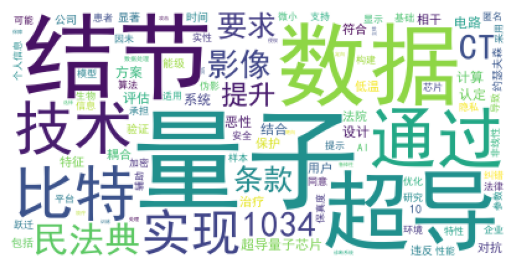

In [39]:
# 1. 文本预处理：分词 + 停用词过滤  
import jieba  
stopwords = ["的", "但", "了", "非常", "建议"]  

def preprocess(text):  
    words = [word for word in jieba.lcut(text) if word not in stopwords and len(word) > 1]
    return " ".join(words)  

df["分词结果"] = df["内容"].apply(preprocess)  

# 2. 构建词袋模型  
from sklearn.feature_extraction.text import TfidfVectorizer 
##############################
# TODO
# 初始化向量化器，最大特征数为100，使用TF-IDF对分词结果进行向量化
tfidf = TfidfVectorizer(max_features = 100)
dtm = tfidf.fit_transform(df["分词结果"])
##############################

# 3. LDA主题提取  
from sklearn.decomposition import LatentDirichletAllocation  
##############################
# TODO
# 初始化LDA模型并拟合数据，主题数为2，随机数种子42
lda = LatentDirichletAllocation(n_components = 2, random_state = 42)
lda.fit(dtm)
##############################

# 4. 词频统计与可视化    
import matplotlib.pyplot as plt  

def Counter(segmented_list):
    word_counts = {}
    ##############################
    # TODO 
    # 统计词频
    word_counts = pd.Series(segmented_list).value_counts().to_dict()
    ##############################
    return word_counts

##############################
# TODO
# 统计词频
word_list = " ".join(df["分词结果"]).split()  
word_counts = Counter(word_list)
##############################
result2_2_1 = word_counts

# 绘制词云图  
from wordcloud import WordCloud  
##############################
# TODO
# 生成词云图，设置字体路径和背景颜色
wordcloud = WordCloud(font_path = 'simhei.ttf', background_color = 'white', max_words = 100).generate_from_frequencies(word_counts)
##############################
plt.imshow(wordcloud)  
plt.axis("off")  
plt.show()  


In [40]:
assert result2_2_1 == stdout['expect2_2_1']  # 验证词频统计数据